# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [66]:
# TODO: RA & Name 
print('RA:181980 ' + 'Bruno Martinez de Farias')
print('RA:220129 ' + 'Leonardo Mazzamboni Colussi')

RA:181980 Bruno Martinez de Farias
RA:220129 Leonardo Mazzamboni Colussi


## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




In [54]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import warnings
import zipfile
from datetime import datetime, date
from sklearn.linear_model import SGDRegressor, LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , RobustScaler, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, balanced_accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Após a leitura do banco de treino, notou-se que haviam 17424 registros duplicados; as duplicatas foram removidas, mantendo-se registros únicos. Dessa forma, o banco passou de 120596 registros para 103172 e 88 colunas.

In [3]:
# Reading de train data set

df = pd.read_csv('SARESP_train.csv')
df.shape, df.duplicated().sum()

((120596, 88), 17424)

In [4]:
#Droping de duplicated information

df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103172 entries, 0 to 120594
Data columns (total 88 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             103172 non-null  int64  
 1   NOMESC               103172 non-null  object 
 2   Q1                   103172 non-null  object 
 3   Q2                   103172 non-null  object 
 4   Q3                   103172 non-null  object 
 5   Q4                   103172 non-null  object 
 6   Q5                   103172 non-null  object 
 7   Q6                   103172 non-null  object 
 8   Q7                   103172 non-null  object 
 9   Q8                   103172 non-null  object 
 10  Q9                   103172 non-null  object 
 11  Q10                  103172 non-null  object 
 12  Q11                  103172 non-null  object 
 13  Q12                  103172 non-null  object 
 14  Q13                  103172 non-null  object 
 15  Q14              

Para aproveitar dos dados referentes aos municípios de localização das escolas e do código destas, o grupo decidiu por utilizar os microdados do MEC (Ministério da Educação) disponibilidados em um de seus [portais de transparência](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar). Para facilitar o acesso, estes podem ser encontrados no repositório deste trabalho [aqui](https://github.com/mazzacolussi/MC886/tree/main/Project2). 

Assim, a alternativa foi obter o número de escolas públicas por município do estado de SP, o número de alunos matriculados por municío desse mesmo estado e número de alunos matriculados em cada uma das escolas. 

In [5]:
headers = ['SG_UF', 'CO_ENTIDADE', 'CO_MUNICIPIO', 'QT_MAT_BAS']

with zipfile.ZipFile('microdados_censo_escolar_2021.zip') as zip_reader:
    with zip_reader.open('2021/dados/microdados_ed_basica_2021.csv') as myZip:
        df_mec = pd.read_csv(myZip,
                             encoding = 'latin-1', 
                             sep = ';',
                             usecols = headers) 
        
df_mec_sp = df_mec[df_mec['SG_UF'] == 'SP'].dropna().reset_index(drop = True)

display(df_mec.head(), df_mec_sp.head())

,SG_UF,CO_MUNICIPIO,CO_ENTIDADE,QT_MAT_BAS
0,RO,1100015,11022558,8.0
1,RO,1100015,11024275,231.0
2,RO,1100015,11024291,10.0
3,RO,1100015,11024372,104.0
4,RO,1100015,11024666,173.0


,SG_UF,CO_MUNICIPIO,CO_ENTIDADE,QT_MAT_BAS
0,SP,3500105,35030806,699.0
1,SP,3500105,35031045,557.0
2,SP,3500105,35031082,952.0
3,SP,3500105,35031100,239.0
4,SP,3500105,35031112,656.0


**Novas variáveis**:

- **MAT_PER_MUN**: Número de alunos matriculados por município;

- **ESC_PER_MUN**: Número de escolas por município;

- **QT_MAT_BAS**: Quantidade de matrículas por escola;

Tais dados são de suma importância e estão diretamente associados ao quanto uma escola pública recebe de verba governamental, o que pode interferir na qualidade de ensino dos alunos.

In [6]:
df_mec_sp = df_mec_sp \
    .groupby('CO_MUNICIPIO')['QT_MAT_BAS'] \
    .agg(MAT_PER_MUN = 'sum', ESC_PER_MUN = 'count') \
    .reset_index() 

df_mec_sp.head()

,CO_MUNICIPIO,MAT_PER_MUN,ESC_PER_MUN
0,3500105,7248.0,26
1,3500204,839.0,5
2,3500303,7287.0,26
3,3500402,1092.0,8
4,3500501,3429.0,19


In [7]:
df_mec = pd.merge(df_mec, 
                  df_mec_sp, 
                  how = 'left', 
                  on = 'CO_MUNICIPIO')

df_mec = df_mec[df_mec['SG_UF'] == 'SP'].drop('SG_UF', axis = 1)

df_mec.rename(columns = {'CO_ENTIDADE': 'CODESC'}, inplace = True)
df_mec['CODESC'] = df_mec['CODESC'].apply(lambda x: str(x)[2:]).astype(int)

In [8]:
# Merge original dataset and MEC's dataset

df = pd.merge(df, df_mec, how = 'left', on = 'CODESC').drop('CO_MUNICIPIO', axis = 1)
df.shape, df.duplicated().sum()

((103172, 91), 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103172 entries, 0 to 103171
Data columns (total 91 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             103172 non-null  int64  
 1   NOMESC               103172 non-null  object 
 2   Q1                   103172 non-null  object 
 3   Q2                   103172 non-null  object 
 4   Q3                   103172 non-null  object 
 5   Q4                   103172 non-null  object 
 6   Q5                   103172 non-null  object 
 7   Q6                   103172 non-null  object 
 8   Q7                   103172 non-null  object 
 9   Q8                   103172 non-null  object 
 10  Q9                   103172 non-null  object 
 11  Q10                  103172 non-null  object 
 12  Q11                  103172 non-null  object 
 13  Q12                  103172 non-null  object 
 14  Q13                  103172 non-null  object 
 15  Q14              

Outra abordagem foi verificar as variáveis `NEC_ESP_1`, `NEC_ESP_2`, `NEC_ESP_3`, `NEC_ESP_4` e `NEC_ESP_5`, uma vez que estas foram as únicas que ainda apresentaram dados faltantes. 

Logo, notou-se que a maioria dos alunos com registros nessas variáveis pertenciam ao grupo de pessoas com deficiência física, auditiva, visual, mental ou múltipla (PcD) ou eram superdotados/com altas habilidades. Como poderá ser observado abaixo, as notas médias dos grupos de pessoas PcD, superdotados ou com ausência de deficiência são bem distintas, sendo assim, um critério para o grupo categorizá-las em 3 classes na variável `disability`:

- **A**: PcD;

- **B**: Superdotados;

- **C**: Não deficientes.

In [10]:
# Disability information

df['NEC_ESP_1'].unique(), df['NEC_ESP_2'].unique(), df['NEC_ESP_3'].unique(), df['NEC_ESP_4'].unique()

(array([nan, 'INTELCTUAL', 'TRANSTORNO DESINTEGRATIVO DA INFANCIA',
        'FISICA-PARALISIA CEREBRAL', 'SURDEZ SEVERA OU PROFUNDA',
        'FISICA-OUTROS', 'MULTIPLA', 'SURDEZ LEVE OU MODERADA',
        'SINDROME DE DOWN', 'AUTISTA INFANTIL', 'SINDROME DE ASPERGER',
        'FISICA-CADEIRANTE', 'BAIXA VISAO', 'SINDROME DE RETT',
        'ALTAS HABILIDADES/SUPERDOTACAO'], dtype=object),
 array([nan, 'BAIXA VISAO', 'FISICA-OUTROS',
        'TRANSTORNO DESINTEGRATIVO DA INFANCIA',
        'FISICA-PARALISIA CEREBRAL', 'FISICA-CADEIRANTE',
        'SURDEZ LEVE OU MODERADA', 'AUTISTA INFANTIL',
        'SURDEZ SEVERA OU PROFUNDA', 'SINDROME DE ASPERGER'], dtype=object),
 array([nan, 'FISICA-CADEIRANTE', 'INTELCTUAL', 'FISICA-OUTROS',
        'SURDEZ LEVE OU MODERADA', 'FISICA-PARALISIA CEREBRAL'],
       dtype=object),
 array([nan, 'INTELCTUAL'], dtype=object))

In [11]:
cond_deficientes = ((df['NEC_ESP_1'].isna() == False) & (df['NEC_ESP_1'] != 'ALTAS HABILIDADES/SUPERDOTACAO')) | (df['NEC_ESP_2'].isna() == False) | (df['NEC_ESP_3'].isna() == False) | (df['NEC_ESP_4'].isna() == False)
cond_superdotados = df['NEC_ESP_1'] == 'ALTAS HABILIDADES/SUPERDOTACAO'

idx_deficientes = df[cond_deficientes].index
idx_superdotados = df[cond_superdotados].index

In [12]:
df[['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp']].mean()

porc_ACERT_MAT    52.685468
porc_ACERT_CIE    56.960714
porc_ACERT_lp     60.465446
dtype: float64

In [13]:
df[cond_deficientes][['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp']].mean()

porc_ACERT_MAT    35.190641
porc_ACERT_CIE    42.150064
porc_ACERT_lp     40.841859
dtype: float64

In [14]:
df[cond_superdotados][['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp']].mean()

porc_ACERT_MAT    68.629412
porc_ACERT_CIE    73.770588
porc_ACERT_lp     75.982353
dtype: float64

In [15]:
# Here we resume all information about disability
# A: has any disability
# B: is gifted
# C: has no disability

df['disability'] = ['C' if i in idx_deficientes else 'B' if i in idx_superdotados else 'A' for i in df.index]

Da variável que continha a data de nascimento do aluno, obteve-se a idade deste na variável `Age`.

In [16]:
#birth date to age information

def age(birth_dt):
    
    today = date.today()
    return today.year - birth_dt.year - ((today.month, today.day) < (birth_dt.month, birth_dt.day))
df['Age'] = pd.to_datetime(df['DT_NASCIMENTO']).apply(lambda x: age(x))

In [17]:
#Here we drop some columns that won't be used

df[['CODMUN', 'CODESC']] = df[['CODMUN', 'CODESC']].astype('str')
drop_cols_categ = ['NOMESC', 'MUN', 'DT_NASCIMENTO', 'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 
                   'TURMA', 'nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie']

drop_cols_numeric = ['CD_ALUNO', 'NEC_ESP_5','Tem_Nec']

df_categ = df.select_dtypes(include = 'object').drop(drop_cols_categ, axis = 1)
df_num = df.select_dtypes(include = 'number').drop(drop_cols_numeric, axis = 1)

df_categ.shape, df_num.shape

((103172, 72), (103172, 7))

In [18]:
#Decription from categorical variables in final dataset
df_categ.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,CODESC,SERIE_ANO,TP_SEXO,PERIODO,Tipo_PROVA,disability
count,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172
unique,4,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,3,3,3,3,3,2,4,2,4,4,3,3,3,3,3,4,4,2,3,3,3,3,3,3,3,5,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,3,3,4,4,4,4,7,65,351,2756,3,2,3,2,3
top,B,E,E,E,E,E,E,E,A,A,A,A,B,A,A,B,A,B,A,A,A,A,A,A,A,C,C,B,C,B,C,B,B,B,C,C,C,C,C,C,C,B,C,C,C,C,C,C,C,B,C,B,B,B,B,A,D,C,C,B,A,A,C,Região Metropolitana de São Paulo,LESTE 2,100,909166,9º Ano EF,F,MANHÃ,C,A
freq,63673,48965,56254,42496,41102,42629,45263,30243,71040,92007,51556,82649,40001,84354,51556,44303,57733,57423,75906,54796,73511,66637,57679,81489,60588,39779,59389,47277,51098,44563,53186,47755,43907,76036,69335,89804,76208,74628,88464,90499,80256,60063,74650,65269,60101,69496,53565,74094,66176,61424,52473,39708,82818,43757,50888,73427,40151,47625,85267,42435,38734,34781,59205,41289,4104,30111,273,48052,53451,71137,103089,101595


In [19]:
#Decription from numerical  variables in final dataset
df_num.describe()

,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,QT_MAT_BAS,MAT_PER_MUN,ESC_PER_MUN,Age
count,103172.000000,103172.000000,103172.000000,103172.000000,1.031720e+05,103172.000000,103172.000000
mean,60.465446,52.685468,56.960714,793.811528,8.154644e+05,2193.049568,15.606201
std,21.814755,21.402735,18.308255,428.773833,1.194702e+06,3208.174791,2.543930
min,0.000000,0.000000,0.000000,61.000000,2.340000e+02,2.000000,10.000000
25%,45.800000,37.500000,45.800000,473.000000,1.202300e+04,47.000000,15.000000
50%,62.500000,50.000000,58.300000,699.000000,6.718600e+04,168.000000,16.000000
75%,79.200000,70.800000,70.800000,1022.000000,2.674792e+06,7187.000000,18.000000
max,100.000000,100.000000,100.000000,2458.000000,2.674792e+06,7187.000000,56.000000


A partir dos boxplots abaixo, é possível observar que na variável `QT_MAT_BAS` há um número significativo de outliers, o que é condizente ao comparar cidades com mais de 1 milhão de habitantes com outras que apresenta um número abaixo de 100 mil, a exemplo de São Paulo e Salto de Pirapora, respectivamente.

Alguns outliers também podem ser notados na variável `Age` tanto para cima, quanto baixo. Tais outliers, provavelmente, ajudam a caracterizar pessoas que fazem supletivo e pessoas superdotadas e/ou que estão no 5º ano, assim o grupo decidiu mantê-los.

Finalmente, as variáveis `ESC_PER_MUN` e `MAT_PER_MUN` apresentam uma distribuição semelhante, já havendo indícios de serem fortemente correlacionadas e, se assim for, podendo manter somente uma na modelagem. Tal fato também é condizente, dado que quanto maior o município no quesito de número de habitantes, maior será o número de escolas e, muito possivelmente, maior o número de alunos matriculados. 


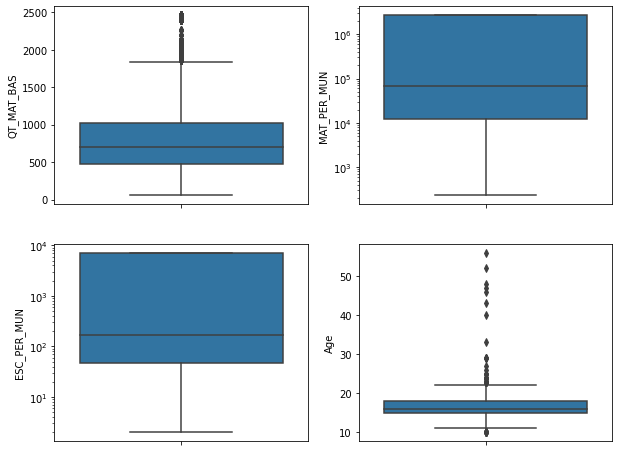

In [23]:
#Some boxplot to see about distribution of numerical variables
f, axes = plt.subplots(2, 2, figsize = (10, 8))

sns.boxplot(y = 'QT_MAT_BAS', data = df, orient ='v', ax = axes[0][0])
sns.boxplot(y = 'MAT_PER_MUN', data = df, orient ='v', ax = axes[0][1]).set(yscale = "log")
sns.boxplot(y = 'ESC_PER_MUN', data = df, orient ='v', ax = axes[1][0]).set(yscale = "log")
sns.boxplot(y = 'Age', data = df, orient = 'v', ax = axes[1][1])

plt.show()

Abaixo estão as distribuições amostrais das variáveis citadas anteriormente:

- O primeiro gráfico apresenta uma distribuição com cauda mais pesada à direita; 

- O gráfico central apresenta uma distribuição com dois picos, representando tipicamente cidades paulistas, majoritariamente pequenas ou grandes; 

- O terceiro gráfico representando que a maior parte dos alunos se encontram na faixa de 10-18 anos, dado que há alunos de 5º ano do Ensino Fundamental, 9º ano do Ensino Fundamental e 3º ano do Ensino Médio, com idades médias de 10, 15 e 17 anos, respectivamente.

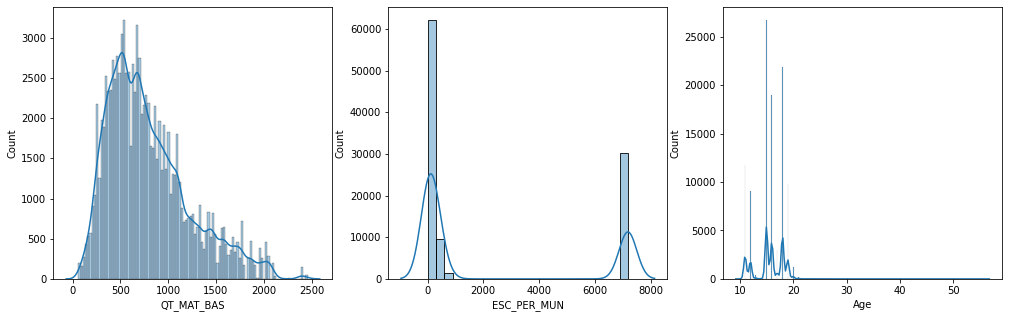

In [83]:
# Distribution - numerical variables
f, axes = plt.subplots(1, 3, figsize = (17, 5))
 
sns.histplot(df['QT_MAT_BAS'], alpha = 0.4, kde = True, kde_kws = {"cut": 3}, ax = axes[0])
sns.histplot(df['ESC_PER_MUN'], alpha = 0.4, kde = True, kde_kws = {"cut": 3}, ax = axes[1])
sns.histplot(df['Age'], alpha = 0.7, kde = True, kde_kws = {"cut": 3}, ax = axes[2])

plt.show()

No que tange às targets da regressão linear, observa-se que o comportamento das curvas referentes às notas de português e Matemática são complementares, enquanto na primeira há um número maior de alunos com rendimento mediano/bom na prova (nota > 50), na segunda ocorre o contrário, sinalizando a deficiência do ensino publico no setor de exatas. Por sua vez, as notas de ciências aparentam estar distribuídas, aproximadamente, conforme uma distribuição Normal.  

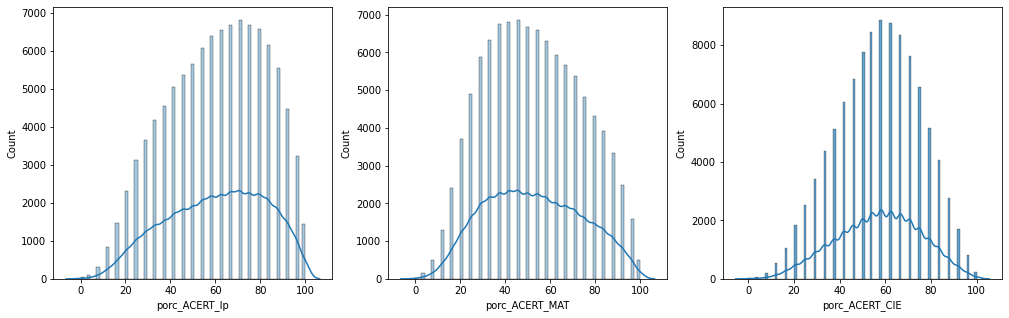

In [81]:
f, axes = plt.subplots(1, 3, figsize = (17, 5))

sns.histplot(df['porc_ACERT_lp'], alpha = 0.4, kde = True, kde_kws = {"cut": 3}, ax = axes[0])
sns.histplot(df['porc_ACERT_MAT'], alpha = 0.4, kde = True, kde_kws = {"cut": 3}, ax = axes[1])
sns.histplot(df['porc_ACERT_CIE'], alpha = 0.7, kde = True, kde_kws = {"cut": 3}, ax = axes[2])

plt.show()

Do gráfico e tabela abaixo se confirma a hipótese anterior de que as variáveis `MAT_PER_MUN` e `ESC_PER_MUN` estão muito correlacionadas (correlação de 99%). Ademais, as outras variáveis numéricas não apresentam correlações muito fortes a ponto de ser necessário retirá-las para a modelagem. 

In [25]:
# Correlation matrix - numeric variables

def plot_corr(df, size = 10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

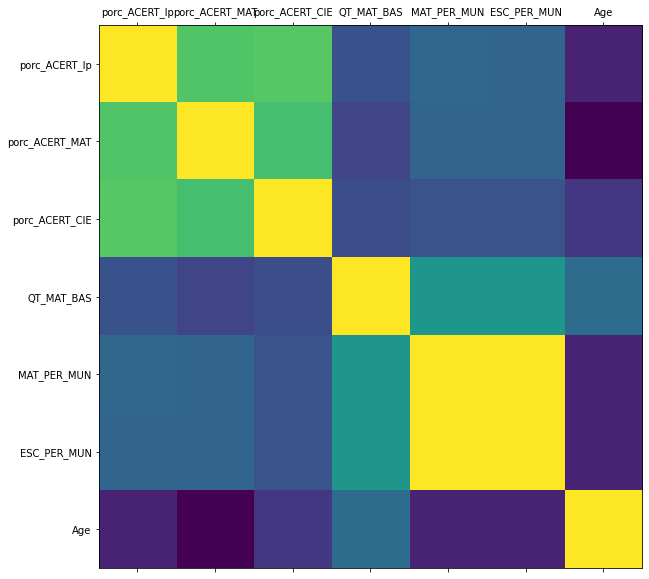

In [26]:
plot_corr(df_num)

In [27]:
# Correlation matrix - numeric variables
df_num.corr()

,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,QT_MAT_BAS,MAT_PER_MUN,ESC_PER_MUN,Age
porc_ACERT_lp,1.000000,0.632669,0.647091,-0.017605,0.084713,0.084469,-0.231271
porc_ACERT_MAT,0.632669,1.000000,0.596637,-0.080114,0.081649,0.081445,-0.362521
porc_ACERT_CIE,0.647091,0.596637,1.000000,-0.034823,-0.013787,-0.013729,-0.139544
QT_MAT_BAS,-0.017605,-0.080114,-0.034823,1.000000,0.352475,0.350742,0.117633
MAT_PER_MUN,0.084713,0.081649,-0.013787,0.352475,1.000000,0.999946,-0.228246
ESC_PER_MUN,0.084469,0.081445,-0.013729,0.350742,0.999946,1.000000,-0.227692
Age,-0.231271,-0.362521,-0.139544,0.117633,-0.228246,-0.227692,1.000000


Então, para finalizar a análise exploratória e o pré-processamento dos dados, construiu-se um pipeline. O dataset apresenta majoritariamente variáveis categóricas, as quais utilizou-se do One-Hot-Encoding (OHE) para variáveis categóricas que não apresentam uma ordem bem definida e do Ordinal Encoding para as que apresentam.

Para as variáveis numéricas, utilizou a padronização robusta, que considera os quartis e medianas das distribuições amostrais, para as variáveis com número considerável de outliers (`QT_MAT_BAS`, `Age`) vistas nos boxplots e a padronização min-max para a variável `ESC_PER_MUN` que apresenta, claramente, dois blocos numéricos. 

In [20]:
# One-Hot-Encoding: OHE
categ_ohe_quests = ['Q9', 'Q22', 'Q24', 'Q34', 'Q59', 'Q61', 'Q62', 'Q63',
                    'RegiaoMetropolitana', 'SERIE_ANO', 'TP_SEXO', 'PERIODO',
                    'Tipo_PROVA', 'disability']


# Ordinal Encoding
## A < B < C < ... 
enc_greater = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q19', 
               'Q20', 'Q21', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 
               'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 
               'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 
               'Q57', 'Q58', 'Q60']

## A > B > C > ... 
enc_lower = ['Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16','Q17', 'Q18', 'Q23', 'Q25', 'Q26', 'Q33']

## Categ: A, D, B, C
categ_ADBC = ['Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49']

## Particular cases
#'Q32'
#'Q42' 

In [21]:
# train and valid split

x_train, x_valid, y_train, y_valid = train_test_split(df,
    pd.DataFrame(df[['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp','nivel_profic_lp',
                 'nivel_profic_mat','nivel_profic_cie']]), 
    test_size=0.2, random_state = 181980)

In [22]:
df_transform = ColumnTransformer(
    [('cat_encod', OneHotEncoder(drop = 'first'), categ_ohe_quests),
    ('Ordinal_lower', OrdinalEncoder(categories = [['A', 'B', 'C', 'D', 'E']] * len(enc_lower)), enc_lower),
    ('Ordinal_greater', OrdinalEncoder(categories = [['E', 'D', 'C', 'B', 'A']] * len(enc_greater)), enc_greater),
    ('Ordinal_ADBC', OrdinalEncoder(categories = [['A', 'D', 'B', 'C']] * len(categ_ADBC)), categ_ADBC),
    ('Ordinal_particular1', OrdinalEncoder(categories = [['D', 'A', 'B', 'C']]), ['Q32']),
    ('Ordinal_particular2', OrdinalEncoder(categories = [['D', 'C', 'E', 'B', 'A']]), ['Q42']),
    ('scale_robust', RobustScaler(), ['Age','QT_MAT_BAS']),
    ('scale_max', MaxAbsScaler(), ['ESC_PER_MUN'] )],
    remainder = 'drop'
)

# Applying pipeline
x_train_prepared = df_transform.fit_transform(x_train)
x_valid_prepared = df_transform.transform(x_valid)


x_prepared = df_transform.transform(df)

## Modelagem

Inicialmente, o grupo implementou uma classe com métodos que ajusta a regressao linear pela Equação Normal, por uma equação fechada, e pelo Gradient Descent, podendo ser dado a taxa de aprendizado (learning rate), o número máximo de iterações e o threshold de parada. Além disso, realiza predições quando há um ajuste feito após ter instanciado um objeto.

In [188]:
class ImplementedRegression():
    
    def __init__(self):
        self.train = False
    
    def fit_normal_equation(self, X, y):
        '''
        X and y must be a np.array.
        '''
        X = np.insert(X, 0, 1, 1)
        
        self.train = True
        self.thetas = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
        
        return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
        

    def fit_gradient(self, X, y, alpha = 0.001, threshold = 10**(-4), iterations = 10**2):
        
        '''
        X and y must be a np.array.
        '''
        
        X = np.insert(X, 0, 1, 1)
                
        self.thetas = np.array([np.random.normal() for i in range(X.shape[1])])
        n = len(y)
        path_gains = list()
         
        for k in range(iterations):
            gradients = list()
            cost_func = 1/(2*n) * np.sum((np.dot(X, self.thetas) - y)**2)

            for j in range(len(self.thetas)):
                gradients.append(1/n * np.sum((np.dot(X, self.thetas) - y) * X[:, j]))

            aux_thetas = np.array([b - alpha*g for b, g in zip(self.thetas, gradients)])
            new_cost_func = 1/(2*n) * np.sum((np.dot(X, aux_thetas) - y)**2) 
            self.thetas = aux_thetas
            
            diff_gain = new_cost_func - cost_func
            path_gains.append(new_cost_func)
            
            if k >= 5 and abs(diff_gain) <= threshold:
                self.train = True
                return self.thetas
        
        self.train = True
        return self.thetas
     
        
    def predict(self, X_test):
        
        if self.train:
            X_test = np.insert(X_test, 0, 1, 1)
            return np.dot(X_test, self.thetas)
        else:
            raise ValueError("You first must fit a linear regression model.")
 

Como pode ser visto abaixo, a Equação Normal apresentou um MSE menor do que o gradient descent implementado pelo grupo. No entanto, isso não se deve ao fato do método ter sido codificado errado, mas sim porque o grupo optou por ter utilizado o número de iterações máximo e o threshold default, que é consideravelmente pequeno. Isso foi feito por motivos de tempo e custo computacional para cada realização (caso tenha um poder computacional bem satisfatório, utilize: iterations = 10\*\*6, threshold = 10\*\*(-12)).

In [189]:
# fitting the group linear regression 

Norm_manual_math = ImplementedRegression()
Norm_manual_sci = ImplementedRegression()
Norm_manual_lp = ImplementedRegression()
Dg_manual_math = ImplementedRegression()
Dg_manual_sci = ImplementedRegression()
Dg_manual_lp = ImplementedRegression()

norm_manual_math = Norm_manual_math.fit_normal_equation(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
norm_manual_sci = Norm_manual_sci.fit_normal_equation(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
norm_manual_lp = Norm_manual_lp.fit_normal_equation(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])

dg_manual_math = Dg_manual_math.fit_gradient(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
dg_manual_sci = Dg_manual_sci.fit_gradient(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
dg_manual_lp = Dg_manual_lp.fit_gradient(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])

norm_manual_math_train_predict = Norm_manual_math.predict(np.nan_to_num(x_train_prepared))
norm_manual_math_valid_predict = Norm_manual_math.predict(np.nan_to_num(x_valid_prepared))

norm_manual_scie_train_predict = Norm_manual_sci.predict(np.nan_to_num(x_train_prepared))
norm_manual_scie_valid_predict = Norm_manual_sci.predict(np.nan_to_num(x_valid_prepared))

norm_manual_lp_train_predict = Norm_manual_lp.predict(np.nan_to_num(x_train_prepared))
norm_manual_lp_valid_predict = Norm_manual_lp.predict(np.nan_to_num(x_valid_prepared))

dg_manual_math_train_predict = Dg_manual_math.predict(np.nan_to_num(x_train_prepared))
dg_manual_math_valid_predict = Dg_manual_math.predict(np.nan_to_num(x_valid_prepared))

dg_manual_scie_train_predict = Dg_manual_sci.predict(np.nan_to_num(x_train_prepared))
dg_manual_scie_valid_predict = Dg_manual_sci.predict(np.nan_to_num(x_valid_prepared))

dg_manual_lp_train_predict = Dg_manual_lp.predict(np.nan_to_num(x_train_prepared))
dg_manual_lp_valid_predict = Dg_manual_lp.predict(np.nan_to_num(x_valid_prepared))


MSE = {"Target" : ['MAT train', 'MAT valid', 'SCI train', 'SCI valid', 'PT train', 'PT valid'],
       "MSE_Normal_Equation" : [mean_squared_error(y_train['porc_ACERT_MAT'], norm_manual_math_train_predict),
                                mean_squared_error(y_valid['porc_ACERT_MAT'], norm_manual_math_valid_predict),
                                mean_squared_error(y_train['porc_ACERT_CIE'], norm_manual_scie_train_predict),
                                mean_squared_error(y_valid['porc_ACERT_CIE'], norm_manual_scie_valid_predict),
                                mean_squared_error(y_train['porc_ACERT_lp'], norm_manual_lp_train_predict),
                                mean_squared_error(y_valid['porc_ACERT_lp'], norm_manual_lp_valid_predict)],
      "MSE_Gradient_desc" : [mean_squared_error(y_train['porc_ACERT_MAT'], dg_manual_math_train_predict),
                             mean_squared_error(y_valid['porc_ACERT_MAT'], dg_manual_math_valid_predict),
                             mean_squared_error(y_train['porc_ACERT_CIE'], dg_manual_scie_train_predict),
                             mean_squared_error(y_valid['porc_ACERT_CIE'], norm_manual_scie_valid_predict),
                             mean_squared_error(y_train['porc_ACERT_lp'], dg_manual_lp_train_predict),
                             mean_squared_error(y_valid['porc_ACERT_lp'], dg_manual_lp_valid_predict)]}

MSE_MANUAL = pd.DataFrame(MSE)
MSE_MANUAL

,Target,MSE_Normal_Equation,MSE_Gradient_desc
0,MAT train,315.834529,498.401036
1,MAT valid,315.215247,500.819400
2,SCI train,255.005088,362.053013
3,SCI valid,259.784159,259.784159
4,PT train,359.322369,514.528741
5,PT valid,357.846517,516.982023


In [42]:
# TODO: Linear Regression. You can use scikit-learn libraries.

# Fitting Linear regression for all targets
reg_model = LinearRegression()
reg_model_mat = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
reg_model_cie = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
reg_model_lp = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])

# Computing the train/valid MSE for each target

mat_train_predict = reg_model_mat.predict(np.nan_to_num(x_train_prepared))
mat_valid_predict = reg_model_mat.predict(np.nan_to_num(x_valid_prepared))
sci_train_predict = reg_model_cie.predict(np.nan_to_num(x_train_prepared))
sci_valid_predict = reg_model_cie.predict(np.nan_to_num(x_valid_prepared))
lp_train_predict = reg_model_lp.predict(np.nan_to_num(x_train_prepared))
lp_valid_predict = reg_model_lp.predict(np.nan_to_num(x_valid_prepared))

MSE = {"Target" : ['MAT train', 'MAT valid', 'SCI train', 'SCI valid', 'PT train', 'PT valid'],
       "MSE" : [mean_squared_error(y_train['porc_ACERT_MAT'], mat_train_predict),
       mean_squared_error(y_valid['porc_ACERT_MAT'], mat_valid_predict),
       mean_squared_error(y_train['porc_ACERT_CIE'], sci_train_predict),
       mean_squared_error(y_valid['porc_ACERT_CIE'], sci_valid_predict),
       mean_squared_error(y_train['porc_ACERT_lp'], lp_train_predict),
       mean_squared_error(y_valid['porc_ACERT_lp'], lp_valid_predict)]}

MSE = pd.DataFrame(MSE)
MSE

,ANSWER,MSE
0,MAT train,420.174208
1,MAT valid,417.841175
2,SCI train,305.604405
3,SCI valid,313.225391
4,PT train,359.322369
5,PT valid,357.846517


Os seis gráficos abaixos compõe o diagnóstico do modelo linear, i.e., a análise dos resíduos para o modelo baseline de cada um dos três targets. Assim, é notório que as condições de homocedasticidade dos resíduos não foram respeitadas, o que impossibilita fazer intervalos de confiança para as predições, caso isso seja desejado.

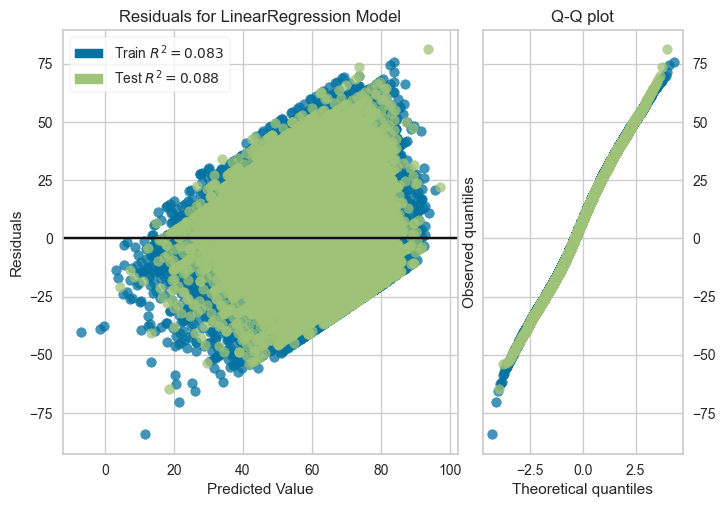

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
# Residuals - mat target

visualizer = ResidualsPlot(reg_model, hist = False, qqplot = True)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_MAT'])
visualizer.show()

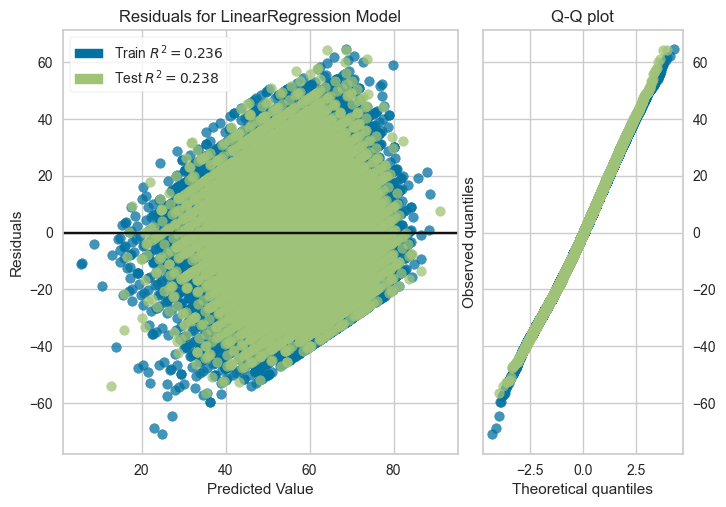

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
# Residuals - science target

reg_model_cie = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])

visualizer = ResidualsPlot(reg_model, hist = False, qqplot = True)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_CIE'])
visualizer.show()

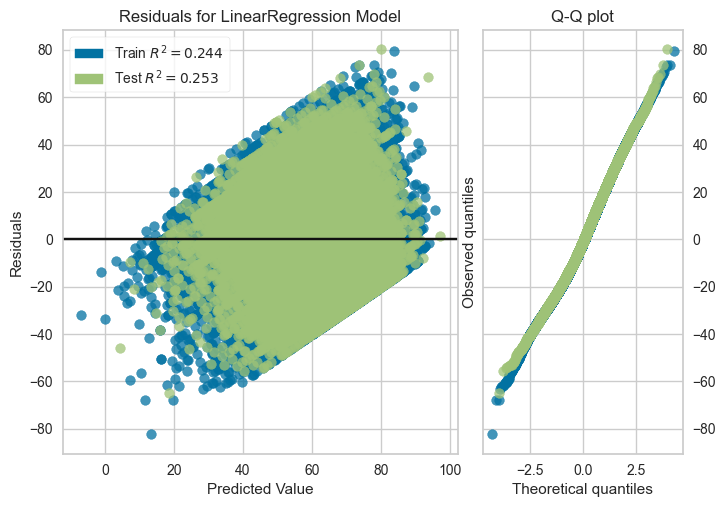

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
# Residuals - lp target

reg_model_lp = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])

visualizer = ResidualsPlot(reg_model, hist = False, qqplot = True)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_lp'])
visualizer.show()


> What are the conclusions? (1-2 paragraphs)

O grupo criou uma classe que calcula os coeficientes de uma regressão linear a qual apresenta métodos que ajustam pela Equação Normal e pela descida do gradiente. Por motivos computacionais, o grupo decidiu manter o default dos hiperparâmetros (número de iterações, threshold - critério de parada) da descida do gradiente baixo, o que pode ter acarretado nos valores altos de MSE tanto para o conjunto de treino quanto para o de validação.

No entato, comparando os resultados obtidos pela Equação Normal da classe apresentada pelo grupo com o ajuste feito com o LinearRegression do pacote do Sklearn, o grupo obteve melhores resultados com base no MSE. O que é um fato interessante, dado que na documentação deste pacote diz que o ajuste também é feito pela Equação Normal e está tem solução fechada e única.

Por curiosidade, o grupo também analisou o comportamento dos resíduos, o qual não se pode identificar a homocedasticidade (variância constante), mesmo que estes sigam, aparentemten, uma distribuição Normal conforme os gráficos QQ-Normal.

2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


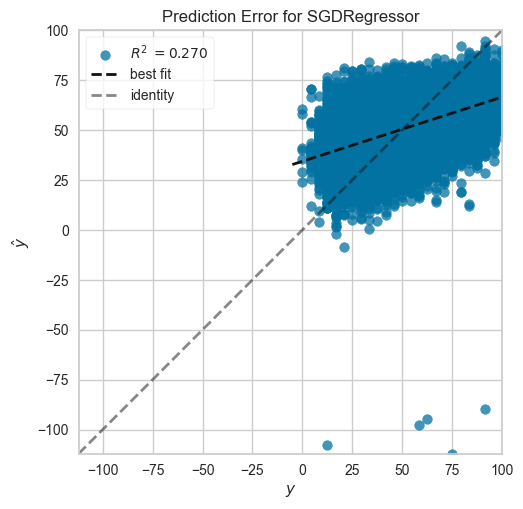

<AxesSubplot:title={'center':'Prediction Error for SGDRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

# Prediction error analysis - mat target
from sklearn.linear_model import SGDRegressor
from yellowbrick.regressor import PredictionError

sgd_reg_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
visualizer = PredictionError(sgd_reg_model)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_MAT'])
visualizer.show()

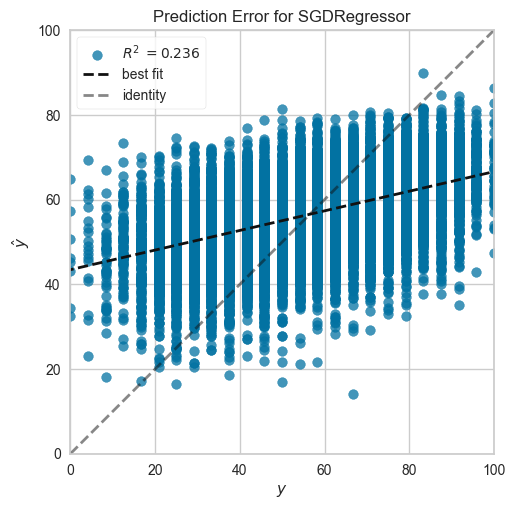

<AxesSubplot:title={'center':'Prediction Error for SGDRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [47]:
# Prediction error analysis - Cie target

sgd_reg_model2 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.01)
visualizer = PredictionError(sgd_reg_model2)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_CIE'])
visualizer.show()

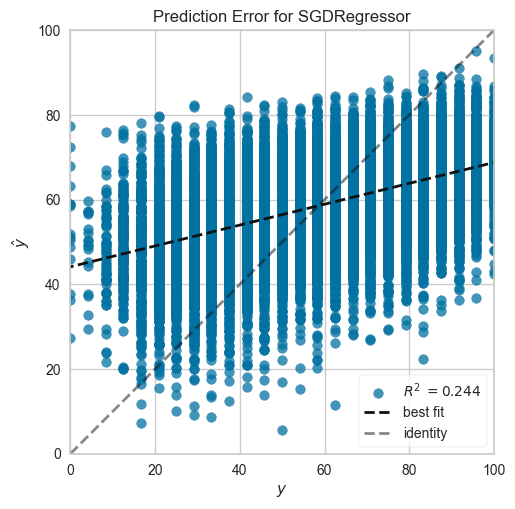

<AxesSubplot:title={'center':'Prediction Error for SGDRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:
# Prediction erro analysis - lp target

sgd_reg_model3 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.001)
visualizer = PredictionError(sgd_reg_model3)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_lp'])
visualizer.show()

In [49]:
# Error Comparison - different learning rates

def cost_by_lr(X, y, learning_rate):
    
    X_train2, X_val,Y_train2, Y_val = train_test_split(X, y, test_size = 0.2, random_state = 181980)
    train_error, val_error = [], []
    
    for lr in learning_rate:
        model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = lr)
        model.fit(X_train2, Y_train2)
        
        y_train2_predict = model.predict(X_train2)
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(Y_train2, y_train2_predict))
        val_error.append(mean_squared_error(Y_val, y_val_predict))
        
        font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,
        }
        
    plt.plot(np.log(train_error), "g-", linewidth = 1, label = "Train")
    plt.plot(np.log(val_error), "r:", linewidth = 2, label = "Val")
    xi = list(range(len(learning_rate)))
    plt.xticks(xi, learning_rate)
    plt.title("Cost Function vs Learning Rate", fontdict = font)
    plt.xlabel("Learning Rate", fontdict = font)
    plt.ylabel("MSE in log scale", fontdict =font)
    plt.legend()

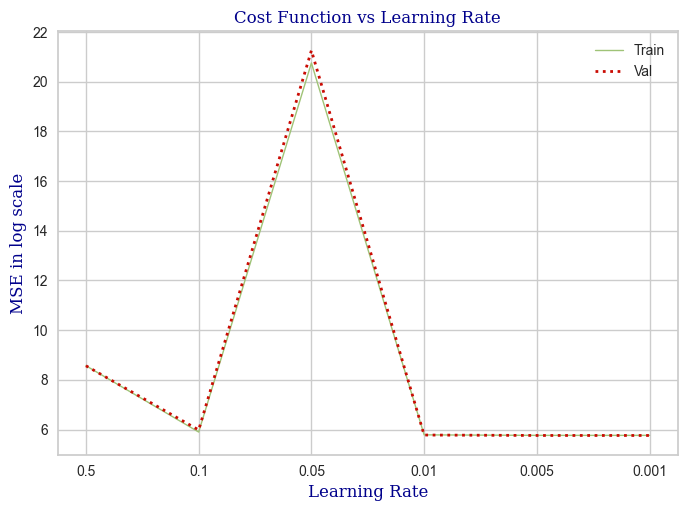

In [50]:
#For math answers
learning_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

cost_by_lr(np.nan_to_num(x_prepared), df['porc_ACERT_MAT'], learning_rate)

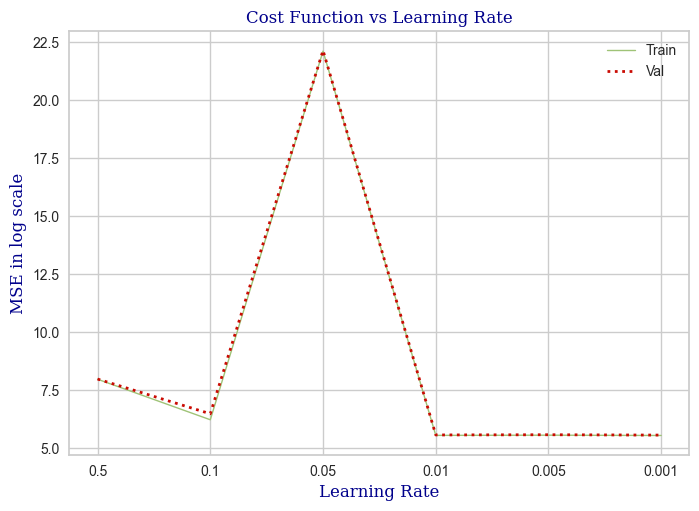

In [51]:
#For Sci answers
learning_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

cost_by_lr(np.nan_to_num(x_prepared), df['porc_ACERT_CIE'], learning_rate)

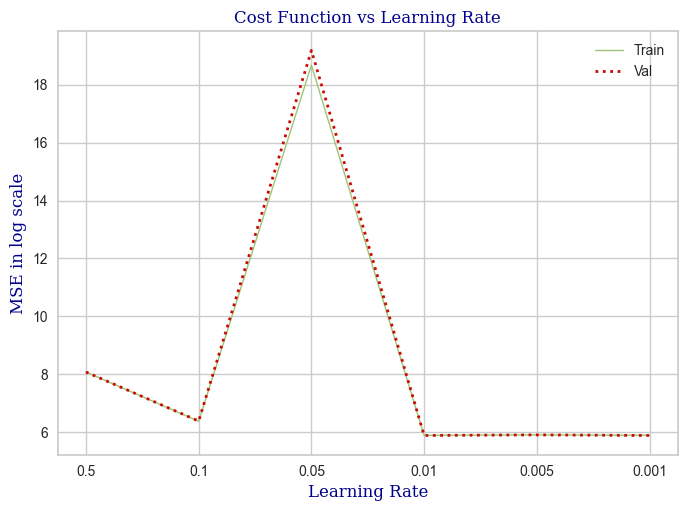

In [52]:
#For pt answers
learning_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

cost_by_lr(np.nan_to_num(x_prepared), df['porc_ACERT_lp'], learning_rate)

### Coments

Após ajustar alguns regressores usando o SDG do sklearn, utilizando diferentes taxas de aprendizado, o grupo pode concluir que $0.01$ é um bom valor para se utilizar com esse conjunto de dados. Além disso, em todas as targets foi observado que valores entre $0.5$ e $0.1$ de taxas de aprendizado escolhidas, o MSE foi instável e chegou em valores altos. No entanto, para $0.01$ o valores para essa métrica foram estáveis e baixos, quando comparado ao intervalo citado anteriormente.



3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [53]:
# TODO: Complex model. You can use scikit-learn libraries.

#Comparison from error between Penalized polinomial regression with diferent alphas

def penalty_eval(X, y):
    
    X_train2, X_val,Y_train2, Y_val = train_test_split(X, y, test_size = 0.2, random_state = 181980)
    train_error_l2, val_error_l2, train_error_l1, val_error_l1 = [], [], [], []
    alphas = [1e-3, 1e-2, 1e-1]
    
    for al in alphas:
        
        model_l2 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', alpha = al, eta0 = 0.01)
        model_l1 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', alpha = al, eta0 = 0.01)
        
        x_poly_prep = np.hstack((X_train2,X_train2**2))
        x_val_prep = np.hstack((X_val,X_val**2))
        
        model_l2.fit(x_poly_prep,Y_train2)
        model_l1.fit(x_poly_prep,Y_train2)
        
        y_train_l2_predict = model_l2.predict(x_poly_prep)
        y_val_l2_predict = model_l2.predict(x_val_prep)
        y_train_l1_predict = model_l1.predict(x_poly_prep)
        y_val_l1_predict = model_l1.predict(x_val_prep)
        
        train_error_l2.append(mean_squared_error(Y_train2,y_train_l2_predict))
        val_error_l2.append(mean_squared_error(Y_val,y_val_l2_predict))
        train_error_l1.append(mean_squared_error(Y_train2,y_train_l1_predict))
        val_error_l1.append(mean_squared_error(Y_val,y_val_l1_predict))
    
    font = {'family': 'serif', 'color':  'darkblue','weight': 'normal','size': 12,}
    plt.plot(np.log(train_error_l2),"g-", linewidth = 1, label = "Train - L2")
    plt.plot(np.log(val_error_l2),"r:", linewidth = 2, label = "Val- L2")
    plt.plot(np.log(train_error_l1),"b-", linewidth = 1, label = "Train- L1")
    plt.plot(np.log(val_error_l1),"m:", linewidth = 2, label = "Val- L1")
    
    xi = list(range(len(alphas)))
    plt.xticks(xi, alphas)
    plt.title("Cost Function - Penalized Polynomial Regression", fontdict = font)
    plt.xlabel("alpha penalty", fontdict = font)
    plt.ylabel("MSE", fontdict = font)
    plt.legend()

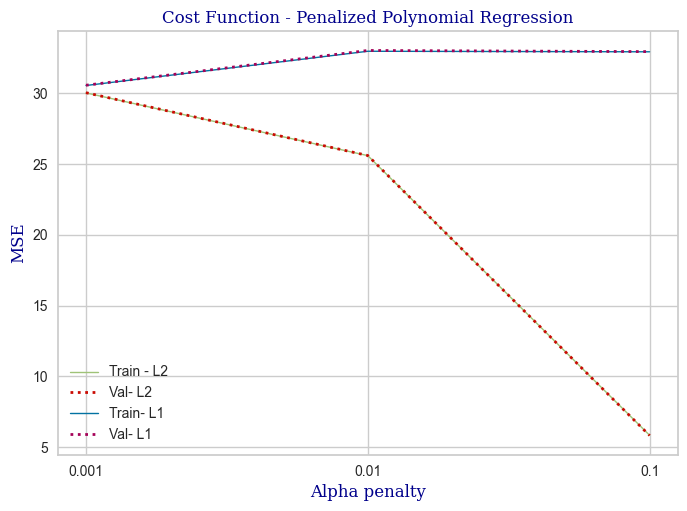

In [54]:
# math target

penalty_eval(np.nan_to_num(x_prepared), df['porc_ACERT_MAT'])

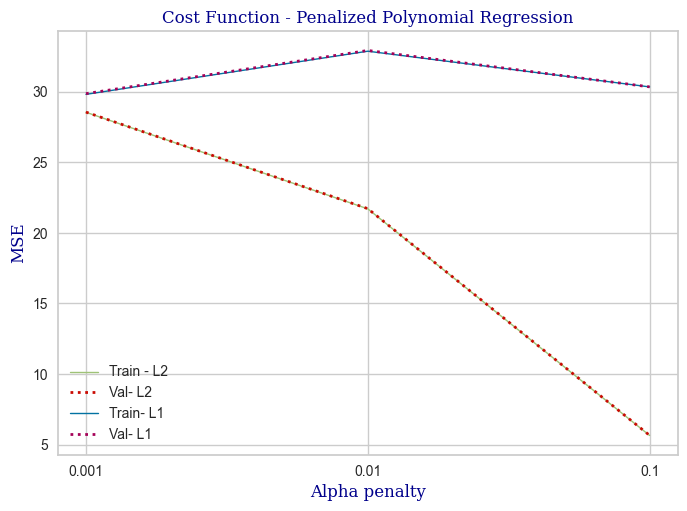

In [55]:
# Scie target

penalty_eval(np.nan_to_num(x_prepared), df['porc_ACERT_CIE'])

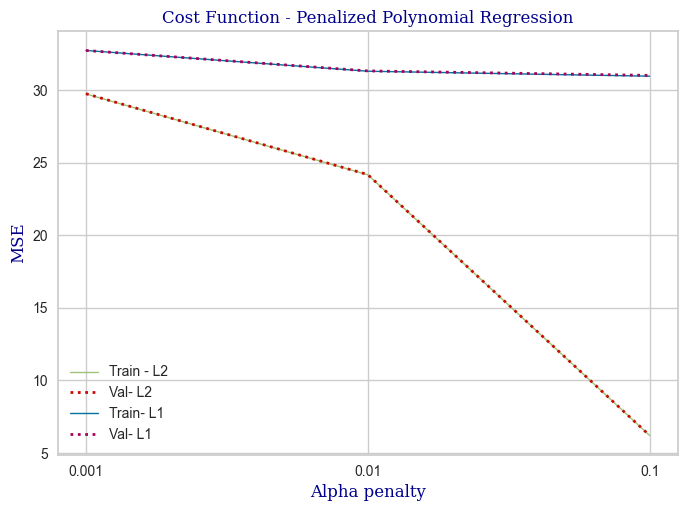

In [56]:
# Pt target

penalty_eval(np.nan_to_num(x_prepared), df['porc_ACERT_lp'])


### What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

O grupo decidiu ajustar uma regressão polinomial de segunda ordem. Para esse fim, considerou-se apenas os termos de primeira e segunda ordem, ou seja, $X_i$ e $X_i^2$, descartando as interações ($X_iX_j$) entre todas as variáveis, por não ser trivial computacionalmente.

Ademais, o grupo aproveitou a oportunidade para empregar as regularizações na regressão polinomial com a finalidade de obter um melhor ajuste. Então, ajustou-se uma regressão polinomial de segunda ordem com a regularização Ridge ($L2$) e Lasso ($L1$), com 3 valores diferentes do hiperparâmetro de regularização para cada caso.

Para a comparação do MSE, modelos simples utilizando o SGD e modelos polinomiais, considerou-se o log do MSE em dentrimento ao RMSE. Essa escolha foi devido à larga variação de valores que do MSEs apresentou e, assim, melhorar a visualização dos gráficos acima.

Por fim, o grupo optou pela regressão polinomial de segunda ordem por ter apresentado resultados melhores me comparação aos modelos mais simples do SGD, embora os ganhos não tenham sido muito significativos.


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [57]:
# TODO: Plot the cost function vs. number of iterations in the training set.

def plot_cost_function(X, y, epochs, learning_rate):
    
    X_train2, X_val,Y_train2, Y_val = train_test_split(X, y, test_size = 0.2, random_state = 181980)
    train_error, val_error = [], []
    
    for epoch in range(1, epochs):
        
        model = SGDRegressor(max_iter = epoch, tol = 1e-3, penalty = None, eta0 = learning_rate)
        model.fit(X_train2, Y_train2)
        
        y_train2_predict = model.predict(X_train2)
        y_val_predict = model.predict(X_val)
        
        train_error.append(mean_squared_error(Y_train2, y_train2_predict))
        val_error.append(mean_squared_error(Y_val, y_val_predict))
        
        font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,}
        
    plt.plot(train_error, "g-", linewidth = 1, label = "Train")
    plt.plot(val_error, "r:", linewidth = 2, label = "Val")
    plt.title("Cost Function vs Epoch size", fontdict = font)
    plt.xlabel("Epoch", fontdict = font)
    plt.ylabel("MSE", fontdict = font)
    plt.legend()

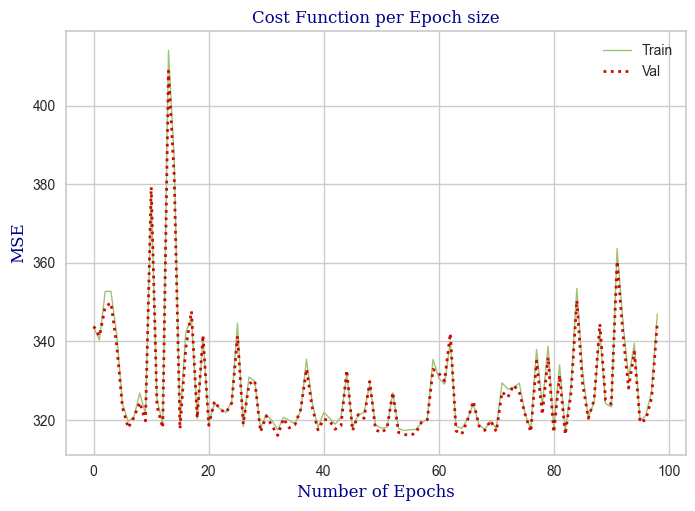

In [58]:
# Mat target

plot_cost_function(np.nan_to_num(x_prepared), df['porc_ACERT_MAT'], 100, 0.01)

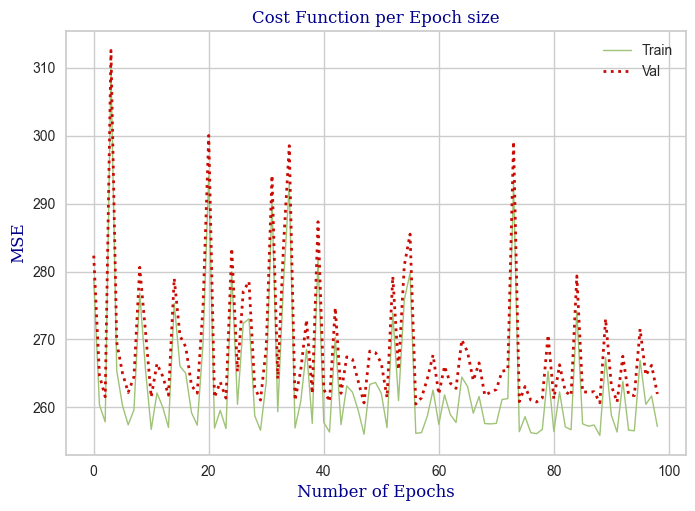

In [59]:
# Cie Target

plot_cost_function(np.nan_to_num(x_prepared), df['porc_ACERT_CIE'], 100, 0.01)

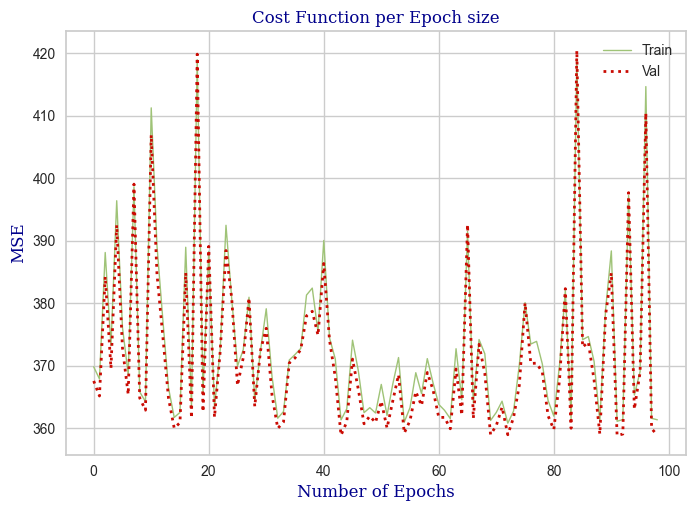

In [60]:
# Lp target

plot_cost_function(np.nan_to_num(x_prepared), df['porc_ACERT_lp'], 100, 0.01)

### What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

O grupo dispôs visualmente a função de custo vs o número de iterações por meio de gráficos, tanto para o conjunto de treinamento quanto para o de validação, utilizando o regressor linear SGD com o max_int = $100$ e learning_rate = $0,01$, que foi decidido arbitrariamente e avaliado como bom o suficiente.

Dessa forma, foi possível observar como o ajuste pelo gradiente estocástico (SGD) funciona. Para diferentes valores de épocas considerados, obteve-se diferentes resultados com grande variação/oscilação do MSE. Logo, notou-se a importância da escolha adequada dos hiperparâmetros.
 

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

Abaixo segue o pré-processamento do conjunto de teste e a sua avaliação no modelo final escolhido.

In [23]:
df_test = pd.read_csv('SARESP_test.csv')
test = pd.merge(df_test, df_mec, how = 'left', on = 'CODESC').drop('CO_MUNICIPIO', axis = 1)

In [24]:
df_test.shape, test.shape

((1000, 87), (1000, 90))

In [25]:
test['Age'] = pd.to_datetime(test['DT_NASCIMENTO']).apply(lambda x: age(x))

In [26]:
cond_deficientes_test = ((test['NEC_ESP_1'].isna() == False) & (test['NEC_ESP_1'] != 'ALTAS HABILIDADES/SUPERDOTACAO')) | (test['NEC_ESP_2'].isna() == False) | (test['NEC_ESP_3'].isna() == False) | (test['NEC_ESP_4'].isna() == False)
cond_superdotados_test = test['NEC_ESP_1'] == 'ALTAS HABILIDADES/SUPERDOTACAO'

idx_deficientes_test = test[cond_deficientes_test].index
idx_superdotados_test = test[cond_superdotados_test].index

test['disability'] = ['C' if i in idx_deficientes_test else 'B' if i in idx_superdotados_test else 'A' for i in test.index]

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 92 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CD_ALUNO             1000 non-null   int64  
 1   NOMESC               1000 non-null   object 
 2   Q1                   1000 non-null   object 
 3   Q2                   1000 non-null   object 
 4   Q3                   1000 non-null   object 
 5   Q4                   1000 non-null   object 
 6   Q5                   1000 non-null   object 
 7   Q6                   1000 non-null   object 
 8   Q7                   1000 non-null   object 
 9   Q8                   1000 non-null   object 
 10  Q9                   1000 non-null   object 
 11  Q10                  1000 non-null   object 
 12  Q11                  1000 non-null   object 
 13  Q12                  1000 non-null   object 
 14  Q13                  1000 non-null   object 
 15  Q14                  1000 non-null   ob

In [28]:
x_test = df_transform.transform(test)

In [29]:
x_prepared.shape

(103172, 88)

In [33]:
x_test.shape

(1000, 88)

In [37]:
# Best model chosen for linear regression

Final_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', alpha = 1e-1, eta0 = 0.01)

x_train_final_prep = np.hstack((x_prepared, x_prepared**2))
x_test_final_prep = np.hstack((x_test, x_test**2))

# Fitting Final model for all targets
final_model_mat = Final_model.fit(np.nan_to_num(x_train_final_prep), df['porc_ACERT_MAT'])
final_model_cie = Final_model.fit(np.nan_to_num(x_train_final_prep), df['porc_ACERT_CIE'])
final_model_lp = Final_model.fit(np.nan_to_num(x_train_final_prep), df['porc_ACERT_lp'])

# Computing the MSE - train and test for each target
final_mat_train_predict = final_model_mat.predict(np.nan_to_num(x_train_final_prep))
final_mat_test_predict = final_model_mat.predict(np.nan_to_num(x_test_final_prep))

final_sci_train_predict = final_model_cie.predict(np.nan_to_num(x_train_final_prep))
final_sci_test_predict = final_model_cie.predict(np.nan_to_num(x_test_final_prep))

final_lp_train_predict = final_model_lp.predict(np.nan_to_num(x_train_final_prep))
final_lp_test_predict = final_model_lp.predict(np.nan_to_num(x_test_final_prep))

MSE_Final = {"Target" : ['MAT train', 'MAT test', 'SCI train', 'SCI test', 'PT train', 'PT test'],
             "MSE" : [mean_squared_error(df['porc_ACERT_MAT'], final_mat_train_predict),
                      mean_squared_error(df_test['porc_ACERT_MAT'], final_mat_test_predict),
                      mean_squared_error(df['porc_ACERT_CIE'], final_sci_train_predict),
                      mean_squared_error(df_test['porc_ACERT_CIE'], final_sci_test_predict),
                      mean_squared_error(df['porc_ACERT_lp'], final_lp_train_predict),
                      mean_squared_error(df_test['porc_ACERT_lp'], final_lp_test_predict)]}

MSE_Final = pd.DataFrame(MSE_Final)
MSE_Final

,Target,MSE
0,MAT train,515.396019
1,MAT test,542.005828
2,SCI train,356.734020
3,SCI test,370.050689
4,PT train,386.279526
5,PT test,413.221892


Conclui-se que o modelo final obtido teve uma perfomance baixa, com um alto valor de MSE. Todavia, dados sociais são difíceis de se prever (sobretudo com um simples modelo de regressão), pois englobal comportamentos humanos.

## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

**Solução:** Dado que a repartição aleatória do dataset, bem como a análise exploratória e o pré-processamento já tenha sido feito, optou-se por reutilizá-los, no entanto, considerando as targets: `nivel_profic_lp`, `nivel_profic_mat` e `nivel_profic_cie`, como requerido.
    

  Notou-se que o dataset completo, assim como nas repartições de treino e validação, apresentam categorias dessas variáveis muito desbalanceadas, como representado abaixo. 

In [31]:
display(df['nivel_profic_lp'].value_counts(normalize = True), 
        x_train['nivel_profic_lp'].value_counts(normalize = True), 
        x_valid['nivel_profic_lp'].value_counts(normalize = True))

Básico              0.449376
Adequado            0.267941
Abaixo do Básico    0.223404
Avançado            0.059280
Name: nivel_profic_lp, dtype: float64

Básico              0.449132
Adequado            0.269467
Abaixo do Básico    0.222458
Avançado            0.058943
Name: nivel_profic_lp, dtype: float64

Básico              0.450351
Adequado            0.261837
Abaixo do Básico    0.227187
Avançado            0.060625
Name: nivel_profic_lp, dtype: float64

In [34]:
display(df['nivel_profic_mat'].value_counts(normalize = True),
        x_train['nivel_profic_mat'].value_counts(normalize = True), 
        x_valid['nivel_profic_mat'].value_counts(normalize = True))

Básico              0.448106
Abaixo do Básico    0.365826
Adequado            0.147802
Avançado            0.038266
Name: nivel_profic_mat, dtype: float64

Básico              0.448235
Abaixo do Básico    0.366454
Adequado            0.147182
Avançado            0.038128
Name: nivel_profic_mat, dtype: float64

Básico              0.447589
Abaixo do Básico    0.363315
Adequado            0.150279
Avançado            0.038818
Name: nivel_profic_mat, dtype: float64

In [35]:
display(df['nivel_profic_cie'].value_counts(normalize = True),
        x_train['nivel_profic_cie'].value_counts(normalize = True), 
        x_valid['nivel_profic_cie'].value_counts(normalize = True))

Básico              0.439848
Abaixo do Básico    0.290476
Adequado            0.211482
Avançado            0.058194
Name: nivel_profic_cie, dtype: float64

Básico              0.441778
Abaixo do Básico    0.289337
Adequado            0.210911
Avançado            0.057974
Name: nivel_profic_cie, dtype: float64

Básico              0.432130
Abaixo do Básico    0.295033
Adequado            0.213763
Avançado            0.059074
Name: nivel_profic_cie, dtype: float64

In [38]:
targets = LabelEncoder()

train_target_lp = targets.fit_transform(x_train['nivel_profic_lp'])
train_target_mat = targets.fit_transform(x_train['nivel_profic_mat'])
train_target_cie = targets.fit_transform(x_train['nivel_profic_cie'])

valid_target_lp = targets.transform(x_valid['nivel_profic_lp'])
valid_target_mat = targets.transform(x_valid['nivel_profic_mat'])
valid_target_cie = targets.transform(x_valid['nivel_profic_cie'])

In [39]:
complete_target_lp = targets.fit_transform(df['nivel_profic_lp'])
complete_target_mat = targets.fit_transform(df['nivel_profic_mat'])
complete_target_cie = targets.fit_transform(df['nivel_profic_cie'])

Sendo assim, o grupo decidiu atribuir pesos conforme a representatividade de cada classe no conjunto de treino para cada uma das variáveis resposta. De início, analisou-se o desempenho do modelo baseline, ou seja, com todas as variáveis e de primeira ordem. 

In [45]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.

w_lp = {0: 22,  
        1: 27, 
        2: 6, 
        3: 45} 

w_mat = {0: 36,
         1: 15,
         2: 4,
         3: 45}

w_cie = {0: 29,
         1: 21,
         2: 6,
         3: 44}

logistic_model_lp = LogisticRegression(multi_class = 'multinomial', class_weight = w_lp)
logistic_model_mat = LogisticRegression(multi_class = 'multinomial', class_weight = w_mat)
logistic_model_cie = LogisticRegression(multi_class = 'multinomial', class_weight = w_cie)

In [40]:
baseline_fit_lp = logistic_model_lp.fit(x_train_prepared, train_target_lp)
baseline_fit_mat = logistic_model_mat.fit(x_train_prepared, train_target_mat)
baseline_fit_cie = logistic_model_cie.fit(x_train_prepared, train_target_cie)

In [40]:
def logistic_penalty_eval(X, y, weights):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 181980)
    
    train_acc_l2, train_acc_l1 = [], []
    train_acc, val_acc_l2 = [], []
    val_acc_l1, val_acc = [], []
    
    C = [0.001, 0.01, 0.1]
        
    for value in C:
               
        x_poly_prep = np.hstack((X_train, X_train**2))
        x_val_prep = np.hstack((X_val, X_val**2))
        
        model_l2 = LogisticRegression(penalty = 'l2', 
                                      C = value, 
                                      class_weight = weights, 
                                      solver = 'saga', 
                                      random_state = 181980)
        
        model_l1 = LogisticRegression(penalty = 'l1',
                                      C = value, 
                                      class_weight = weights, 
                                      solver = 'saga',
                                      random_state = 181980)
        
        model = LogisticRegression(penalty = 'none', 
                                   C = value, 
                                   class_weight = weights, 
                                   solver = 'saga',
                                   random_state = 181980)
        
        
        model_l2.fit(x_poly_prep, y_train)
        model_l1.fit(x_poly_prep, y_train)
        model.fit(x_poly_prep, y_train)
        
        
        y_train_l2_predict = model_l2.predict(x_poly_prep)
        y_val_l2_predict = model_l2.predict(x_val_prep)
        
        y_train_l1_predict = model_l1.predict(x_poly_prep)
        y_val_l1_predict = model_l1.predict(x_val_prep)
        
        y_train_predict = model.predict(x_poly_prep)
        y_val_predict = model.predict(x_val_prep)
        
        
        train_acc_l2.append(balanced_accuracy_score(y_train, y_train_l2_predict))
        val_acc_l2.append(balanced_accuracy_score(y_val, y_val_l2_predict))
        
        train_acc_l1.append(balanced_accuracy_score(y_train, y_train_l1_predict))
        val_acc_l1.append(balanced_accuracy_score(y_val, y_val_l1_predict))
        
        train_acc.append(balanced_accuracy_score(y_train, y_train_predict))
        val_acc.append(balanced_accuracy_score(y_val, y_val_predict))
    
    
    font = {'family': 'serif', 'color': 'darkblue', 'weight': 'normal', 'size': 12,}
    c_i = list(range(len(C)))
    
    plt.figure(figsize = (12, 8))
    
    plt.plot(train_acc_l2, "g-", linewidth = 2, label = "Train - L2")
    plt.plot(val_acc_l2, "g--", linewidth = 2, label = "Val - L2")
    
    plt.plot(train_acc_l1, "b-", linewidth = 2, label = "Train - L1")
    plt.plot(val_acc_l1, "b--", linewidth = 2, label = "Val - L1")
    
    plt.plot(train_acc, "r-", linewidth = 2, label = "Train")
    plt.plot(val_acc, "r--", linewidth = 2, label = "Val")
    
    plt.xticks(c_i, C)
    plt.title("Penalized Logistic Regression - 2nd Order", fontdict = font)
    plt.xlabel("C penalty", fontdict = font)
    plt.ylabel("Balanced Accuracy", fontdict = font)
    plt.legend()

Regressão Logística para a target lp, considerando variáveis de segunda ordem, com reguralização $L_1$, $L_2$ e sem regularização

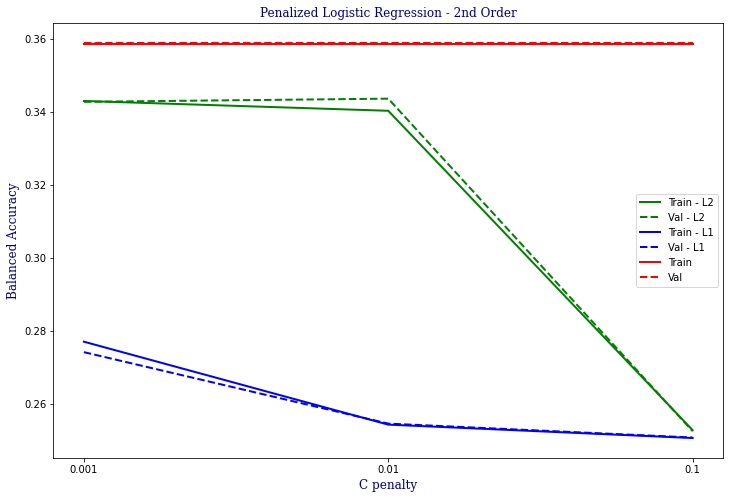

In [165]:
logistic_penalty_eval(x_prepared, complete_target_lp, w_lp)

Regressão Logística para a target mat, considerando variáveis de segunda ordem, com reguralização $L_1$, $L_2$ e sem regularização

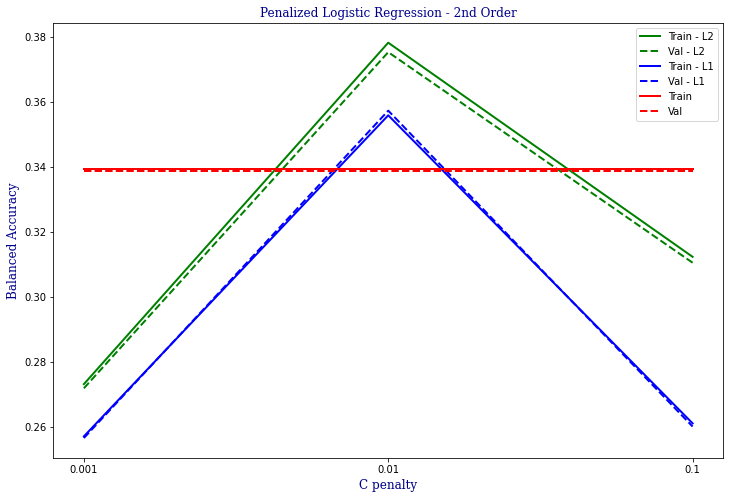

In [166]:
logistic_penalty_eval(x_prepared, complete_target_mat, w_mat)

Regressão Logística para a target cie, considerando variáveis de segunda ordem, com reguralização $L_1$, $L_2$ e sem regularização

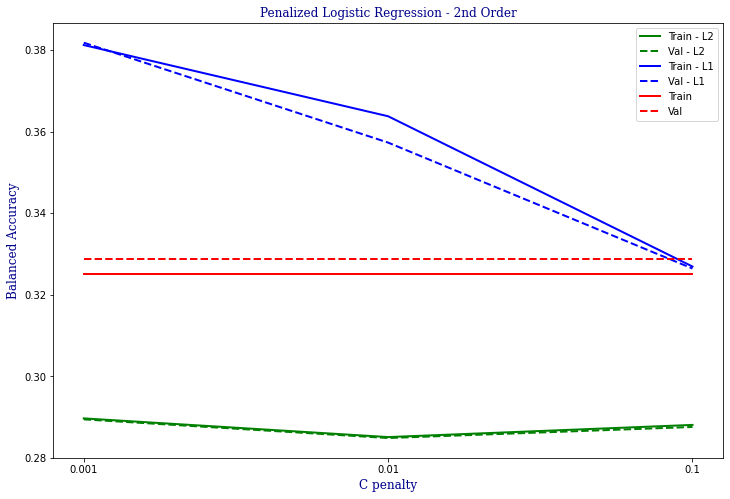

In [167]:
logistic_penalty_eval(x_prepared, complete_target_cie, w_cie)

Na tentativa de melhorar o desempenho dos modelos, treinou-os com um número menor de variáveis que, segundo o dicionário fornecido neste trabalho, são as variáveis relacionadas ao estudo. No entanto, o desempenho apenas, piorou conforme os gráficos abaixo.

In [62]:
# One-Hot-Encoding: OHE
categ_ohe_quests_logistic = ['Q9', 'Q22', 'Q24', 'Q34', 'Q59', 'Q61', 'Q62', 'Q63']


# Ordinal Encoding
## A < B < C < ... 
enc_greater_logistic = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q19', 
               'Q20', 'Q21', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 
               'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 
               'Q57', 'Q58', 'Q60']

## A > B > C > ... 
enc_lower_logistic = ['Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', S
             'Q16','Q17', 'Q18', 'Q23', 'Q25', 'Q26', 'Q33']

## Categ: A, D, B, C
categ_ADBC_logistic = ['Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49']

## Particular cases
#'Q32'
#'Q42' 


df_transform_logistic = ColumnTransformer(
    [('cat_encod', OneHotEncoder(drop = 'first'), categ_ohe_quests_logistic),
    ('Ordinal_lower', OrdinalEncoder(categories = [['A', 'B', 'C', 'D', 'E']] * len(enc_lower_logistic)), enc_lower_logistic),
    ('Ordinal_greater', OrdinalEncoder(categories = [['E', 'D', 'C', 'B', 'A']] * len(enc_greater_logistic)), enc_greater_logistic),
    ('Ordinal_ADBC', OrdinalEncoder(categories = [['A', 'D', 'B', 'C']] * len(categ_ADBC_logistic)), categ_ADBC_logistic),
    ('Ordinal_particular1', OrdinalEncoder(categories = [['D', 'A', 'B', 'C']]), ['Q32']),
    ('Ordinal_particular2', OrdinalEncoder(categories = [['D', 'C', 'E', 'B', 'A']]), ['Q42'])],
    remainder = 'drop'
)


x_train_logistic, x_valid_logistic, y_train_logistic, y_valid_logistic = train_test_split(
    df,
    pd.DataFrame(df[['porc_ACERT_lp','nivel_profic_lp', 'nivel_profic_mat','nivel_profic_cie']]), 
    test_size = 0.2, 
    random_state = 181980)

# Applying pipeline
x_train_prepared_logistic = df_transform_logistic.fit_transform(x_train_logistic)
#x_valid_prepared = df_transform.transform(x_valid)

x_prepared_logistic = df_transform_logistic.transform(df)

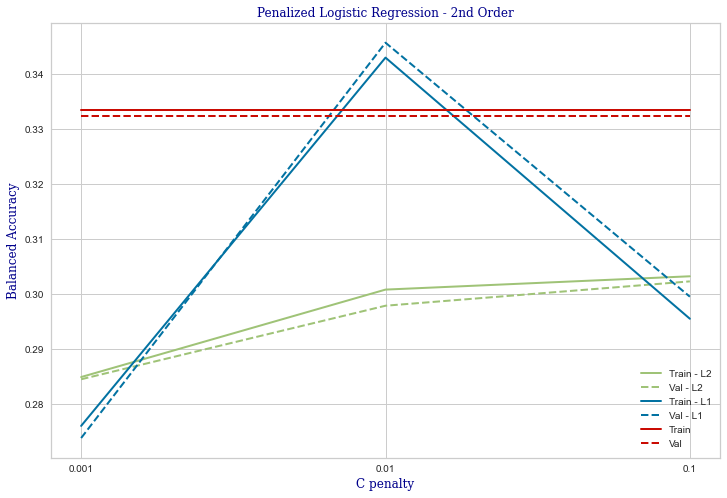

In [64]:
logistic_penalty_eval(x_prepared_logistic, complete_target_lp, w_lp)

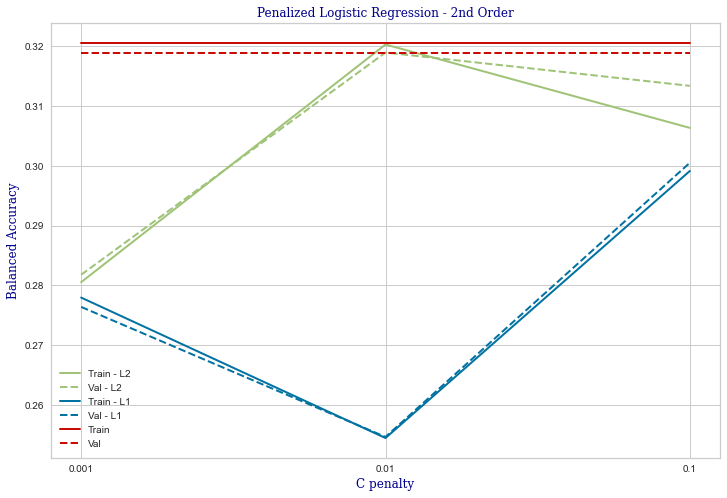

In [65]:
logistic_penalty_eval(x_prepared_logistic, complete_target_mat, w_mat)

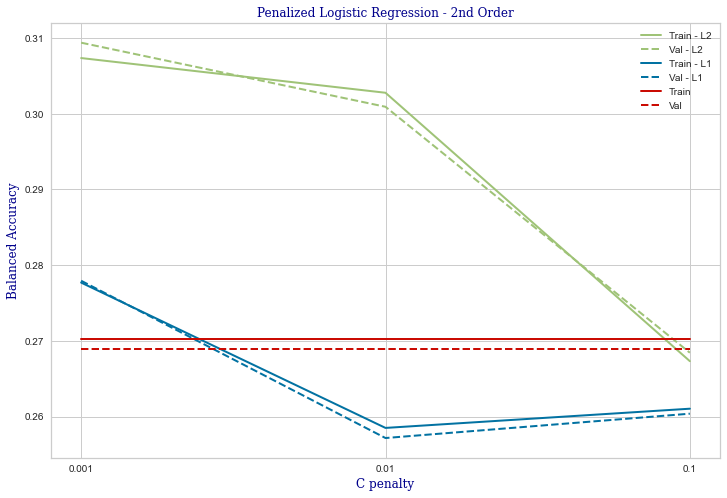

In [63]:
logistic_penalty_eval(x_prepared_logistic, complete_target_cie, w_cie)

> What are the conclusions? (1-2 paragraphs)

Os melhores modelos obtidos para as targets lp, mat e cie foram, respectivamente, a regressão logística de ordem 2 sem penalização, com penalização $L2$ e coeficiente de regularização igual a 0.01 e, por fim, com penalização $L1$ e coeficiente de regularização igual a 0.001. No entanto, nenhum apresentou uma acurácia balanceada satisfatória.

2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [190]:
def costFunction_by_logloss(x_train, y_train, x_val, y_val, epochs, weights):
    
    train_error = []
    val_error = []
    
    for epoch in range(1, epochs):
            
        lr = LogisticRegression(multi_class = 'multinomial', class_weight = weights, max_iter = epoch, tol=1e-3)

        lr.fit(x_train, y_train)
        y_train_pred = lr.predict_proba(x_train)
        y_val_pred = lr.predict_proba(x_val)

        train_error.append(log_loss(y_train, y_train_pred))
        val_error.append(log_loss(y_val, y_val_pred))            
    
    font = {'family': 'serif', 'color':  'darkblue', 'weight': 'normal', 'size': 12}
    
    plt.figure(figsize = (12, 8))
    plt.plot(train_error, "g-", linewidth = 2, label = "Train")
    plt.plot(val_error, "r--", linewidth = 2, label = "Val")
    plt.title("Cost Function (Log_loss) vs Epoch", fontdict = font)
    plt.xlabel("Epoch", fontdict = font)
    plt.ylabel("Log-loss", fontdict = font)
    plt.legend()

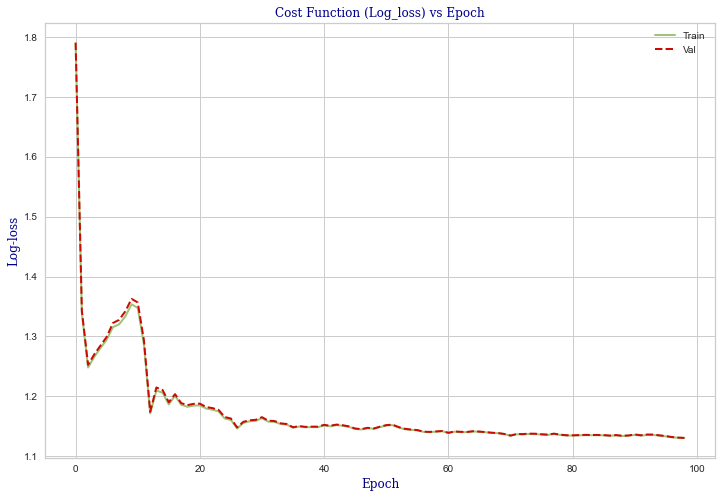

In [191]:
costFunction_by_logloss(x_train_prepared, train_target_lp, x_valid_prepared, valid_target_lp, 100, w_lp)

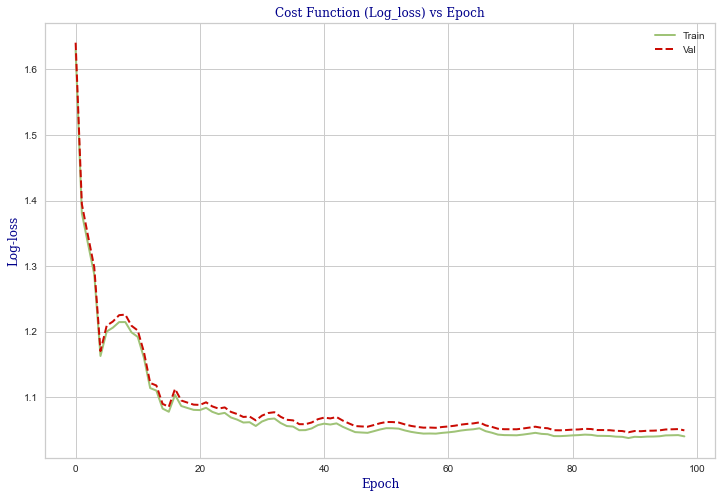

In [192]:
costFunction_by_logloss(x_train_prepared, train_target_mat, x_valid_prepared, valid_target_mat, 100, w_mat)

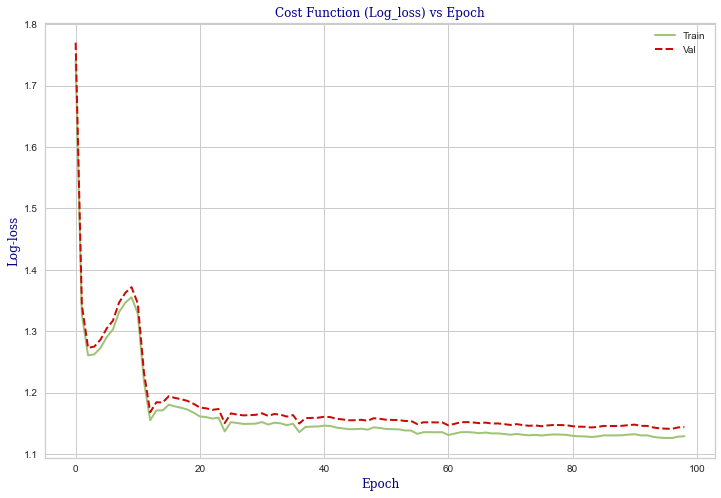

In [193]:
costFunction_by_logloss(x_train_prepared, train_target_cie, x_valid_prepared, valid_target_cie, 100, w_cie)

> What are the conclusions? (1-2 paragraphs)

Dos três últimos gráficos acima, nota-se que, embora haja uma oscilação da métrica log-loss conforme a época, após a época = 20 os valores para essa métrica variam pouco, tendendo a estabilizar e não havendo grande ganhos de perfomance para as três variáveis targets em questão.

3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [47]:
final_model_lp = LogisticRegression(penalty = 'none',  
                             class_weight = w_lp, 
                             solver = 'saga', 
                             random_state = 181980)

final_model_mat = LogisticRegression(penalty = 'l2', 
                             C = 0.01, 
                             class_weight = w_mat, 
                             solver = 'saga', 
                             random_state = 181980)

final_model_cie = LogisticRegression(penalty = 'l1', 
                             C = 0.001, 
                             class_weight = w_cie, 
                             solver = 'saga', 
                             random_state = 181980)

In [48]:
final_model_lp.fit(x_train_prepared, train_target_lp)
final_model_mat.fit(x_train_prepared, train_target_mat)
final_model_cie.fit(x_train_prepared, train_target_cie)

LogisticRegression(C=0.001, class_weight={0: 29, 1: 21, 2: 6, 3: 44},
                   penalty='l1', random_state=181980, solver='saga')

In [49]:
predictions_lp = final_model_lp.predict(x_test)
predictions_mat = final_model_mat.predict(x_test)
predictions_cie = final_model_cie.predict(x_test)

In [50]:
df_test.head()

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,MUN,CODESC,SERIE_ANO,TURMA,TP_SEXO,DT_NASCIMENTO,PERIODO,NEC_ESP_1,NEC_ESP_2,NEC_ESP_3,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_mat,nivel_profic_cie
0,24968515,BADY BASSIT DEPUTADO,A,D,E,E,D,D,D,C,A,A,B,B,C,B,B,C,B,B,A,C,A,A,A,A,B,B,C,B,A,B,C,C,A,B,C,C,C,C,C,C,C,B,B,C,C,C,C,C,C,C,D,B,B,C,A,C,B,C,A,D,C,A,C,Interior,SAO JOSE DO RIO PRETO,647,SAO JOSE DO RIO PRETO,28548,EM-3ª série,A,M,2/21/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,95.8,79.2,91.7,Adequado,Avançado
1,24125615,LAVINIA RIBEIRO ARANHA PROFESSORA,B,E,E,D,E,C,D,E,A,B,A,A,B,A,B,C,B,C,C,B,A,B,C,A,B,D,B,A,C,A,B,D,D,B,C,C,C,C,B,C,C,E,C,C,D,C,B,B,D,B,D,C,B,D,B,B,D,C,A,A,A,A,C,Interior,JUNDIAI,712,VARZEA PAULISTA,911112,9º Ano EF,B,M,4/2/2006,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,62.5,20.8,37.5,Abaixo do Básico,Abaixo do Básico
2,25883237,CARLOS AUGUSTO DE FREITAS VILLALVA JUNIOR DOUTOR,A,E,E,A,E,E,E,E,A,A,C,C,C,A,A,A,A,C,A,A,A,B,B,B,B,D,A,A,B,A,A,B,D,B,C,C,C,C,C,C,C,B,C,D,C,C,D,C,C,B,C,C,B,A,A,A,A,B,C,B,A,D,C,Região Metropolitana de São Paulo,SUL 1,100,SAO PAULO,4704,EM-3ª série,Q,M,2/4/2003,NOITE,NaN,NaN,NaN,NaN,NaN,C,0,58.3,33.3,12.5,Abaixo do Básico,Abaixo do Básico
3,37558282,TOLENTINO MIRAGLIA DOUTOR,C,C,E,E,E,D,E,D,A,A,A,A,A,A,A,B,A,A,A,B,A,A,A,A,A,C,C,C,C,B,C,C,B,B,C,C,C,C,C,C,C,A,C,C,D,D,C,C,D,C,D,C,B,C,C,A,E,C,A,D,C,D,C,Interior,JAU,401,JAU,25628,EM-3ª série,B,F,12/12/2003,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,91.7,91.7,87.5,Adequado,Adequado
4,32446964,HELIO HELENE,B,E,E,E,E,E,D,D,C,A,B,A,A,A,B,B,B,A,B,B,A,A,A,A,B,A,C,B,B,A,A,D,B,B,C,C,B,C,C,C,C,B,C,C,C,C,C,C,C,B,C,B,B,A,B,A,D,C,C,B,A,A,B,Região Metropolitana de São Paulo,LESTE 2,100,SAO PAULO,283885,5º Ano EF,A,M,6/23/2010,MANHÃ,NaN,NaN,NaN,NaN,NaN,C,0,83.3,70.8,58.3,Básico,Adequado


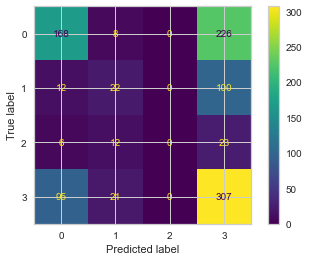

In [61]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.
disp_mat = ConfusionMatrixDisplay(confusion_matrix(df_test['nivel_profic_mat'], targets.inverse_transform(predictions_mat)))
disp_mat.plot()

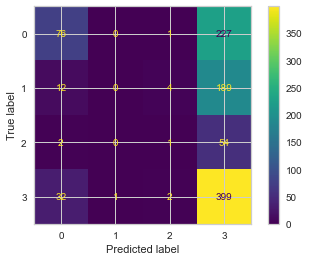

In [59]:
disp_cie = ConfusionMatrixDisplay(confusion_matrix(targets.transform(df_test['nivel_profic_cie']), predictions_cie))
disp_cie.plot()

> What are the conclusions? (1-2 paragraphs)

O grupo observou que os melhores modelos obtidos apresentaram uma péssima perfomance, decorando a classe 3 que, no caso, era referente à classe "básico". Isso ocorreu porque, tanto no conjunto usado para treinar, quanto para validar, essa classe foi a majoritária.

Além disso, notou-se que a classe 2, que se refere à classe de "avançado", foi a mais difícil do modelo acertar, pois esses casos foram raríssimos (cerca de 5%) no conjunto total utilizado no treino, o que levou a ter baixa acurácia balanceada, baixa sensibilidade e baixa precisão. Uma possível alternativa para trabalhos futuros é balancear as classes ou treinar com modelos mais complexos. 

## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**